# BL40A2020 Wireless Communication Systems

## Assignment  week 4: Probability theory and random processes

## Author: Vili Raunola

### 1. Follow similar steps done in the [notes](https://github.com/pedrohjn/wireless-comm/blob/master/Week%204/week4.ipynb) to analyze the *[Binary erasure channel](https://komm.readthedocs.io/en/latest/komm.BinaryErasureChannel/)* 

![](https://upload.wikimedia.org/wikipedia/commons/b/b6/Binary_erasure_channel.svg)

**(a) Consider that the probabilities related to the input sequence is the following:**
- $q$ is the probability that the input bit is $0$ 
- $1-q$ is the probability that the input bit is $1$.

**Compute analytically (as a function of $p$ and $q$):**
- Probability that the output is $e$
- Probability that the input is $0$ if the output is $e$ (error)
- Probability that the input is $1$ if the output is $e$ (error)

In [167]:
# installing library
! pip install komm

In [168]:
import komm
import sympy as sp
sp.init_printing() 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sympy.stats import density, cdf
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

P(receive e) = P(receive e | send 0) AND P(send 0) OR P(receive e | send 1) AND P(send 1) 

In [169]:
p, q = sp.symbols('p, q')
e = q*p + (1-q)*p
e

P(send 0 | receive e) = P(receive e | send 0) AND P(send 0) / P(receive e)

In [170]:
i_zero = p*(q/e)
i_zero

P(send 1 | receive e) = P(receive e | send 1) AND P(send 1) / P(receive e)

In [171]:
i_one = p*((1-q)/e)
i_one

**(b) Test the analytical results via simulation (see tutorial) considering that $p=0.1$ and $q=0.4$**

In [172]:
p_value = 0.1
q_value = 0.4

simulation_amount = 100_000
# Error
e_value = e.subs(p, p_value).subs(q, q_value)
print("Probability of an error when sending either 0 or 1.")
input_seq = np.random.choice([0, 1], size=simulation_amount, p=[q_value, 1-q_value])
zeros_amount = (input_seq == 0).sum()
ones_amount = (input_seq == 1).sum()
bec = komm.BinaryErasureChannel(p_value)
output_list = bec(input_seq)
output_error_amount = (output_list == 2).sum()

print("Analytical",  round(e_value, 2))
print("Simulation", output_error_amount/simulation_amount)


Probability of an error when sending either 0 or 1.
Analytical 0.10
Simulation 0.10111


In [173]:
#Probability of sent 0 when e received
print("Probability of 0 being sent if e received.")
e_zero_value = i_zero.subs(p, p_value).subs(q, q_value)
one_errors = 0
zero_errors = 0

for i in range(simulation_amount):
    if output_list[i] == 2:
        if input_seq[i] == 0:
            zero_errors += 1
        if input_seq[i] == 1:
            one_errors += 1
print("Analytical",  round(e_zero_value, 2))
print("Simulation", zero_errors/output_error_amount)

Probability of 0 being sent if e received.
Analytical 0.40
Simulation 0.40134506972604095


In [174]:
#Probability of sent 1 when e received
print("Probability of 1 being sent if e received.")
e_one_value = i_one.subs(p, p_value).subs(q, q_value)
print("Analytical",  round(e_one_value, 2))
print("Simulation", one_errors/output_error_amount)

Probability of 1 being sent if e received.
Analytical 0.60
Simulation 0.5986549302739591


**2. Consider two independent Gaussian random variables so that**
- $X$ has mean $\mu_X$ and variance $\sigma_X^2$
- $Y$ has mean $\mu_Y$ and variance $\sigma_Y^2$

**Consider a new random variable so that: $Z =  X + Y$. If $X$ and $Y$ are independent Gaussian random variables, then $\mu_Z = \mu_X +\mu_Y$ and variance $\sigma_Z^2 = \sigma_X^2 +\sigma_Y^2$. Plot the probaility density function and the cumulative density function of $X, Y, Z$ considering that**
- $\mu_X=10$ and $\sigma_X^2=1$
- $\mu_Y=2$ and $\sigma_Y^2=3$

**How is the shape of this ditribution in relation to the original ones?**

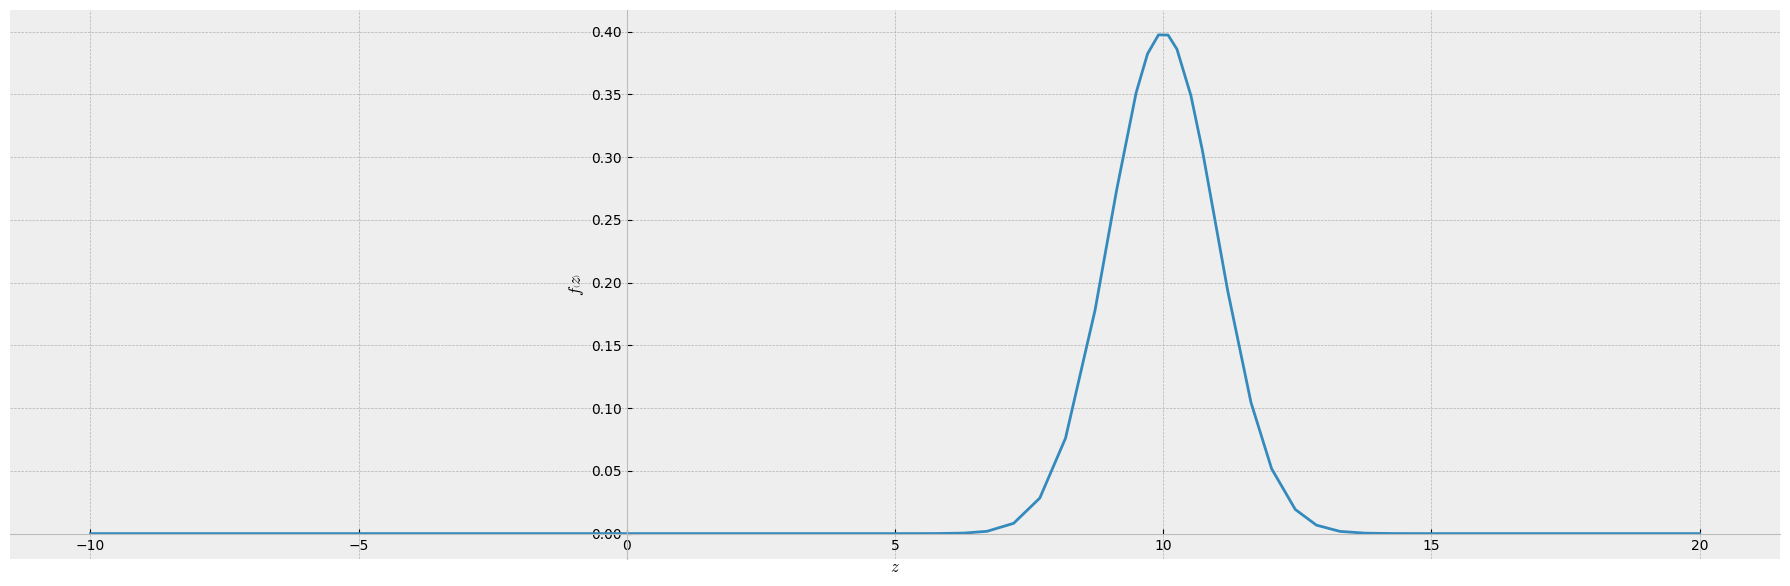

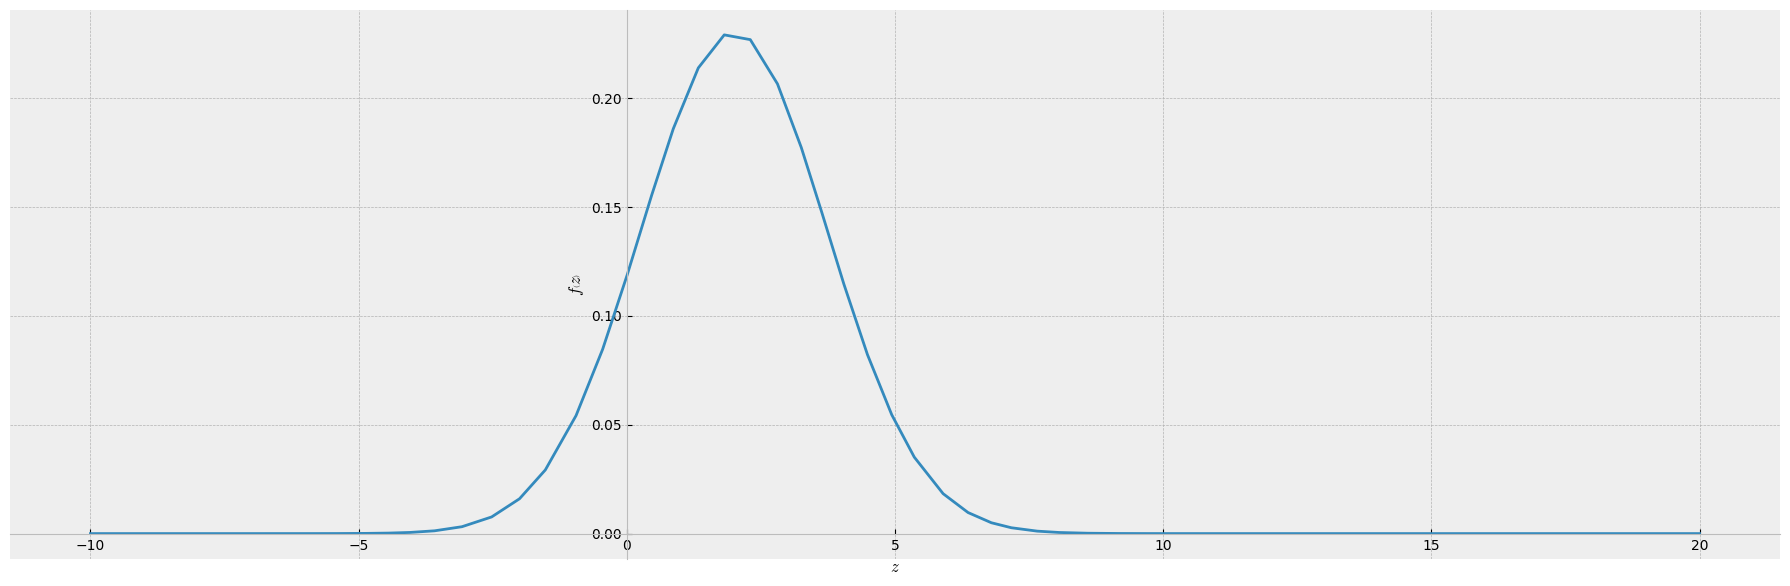

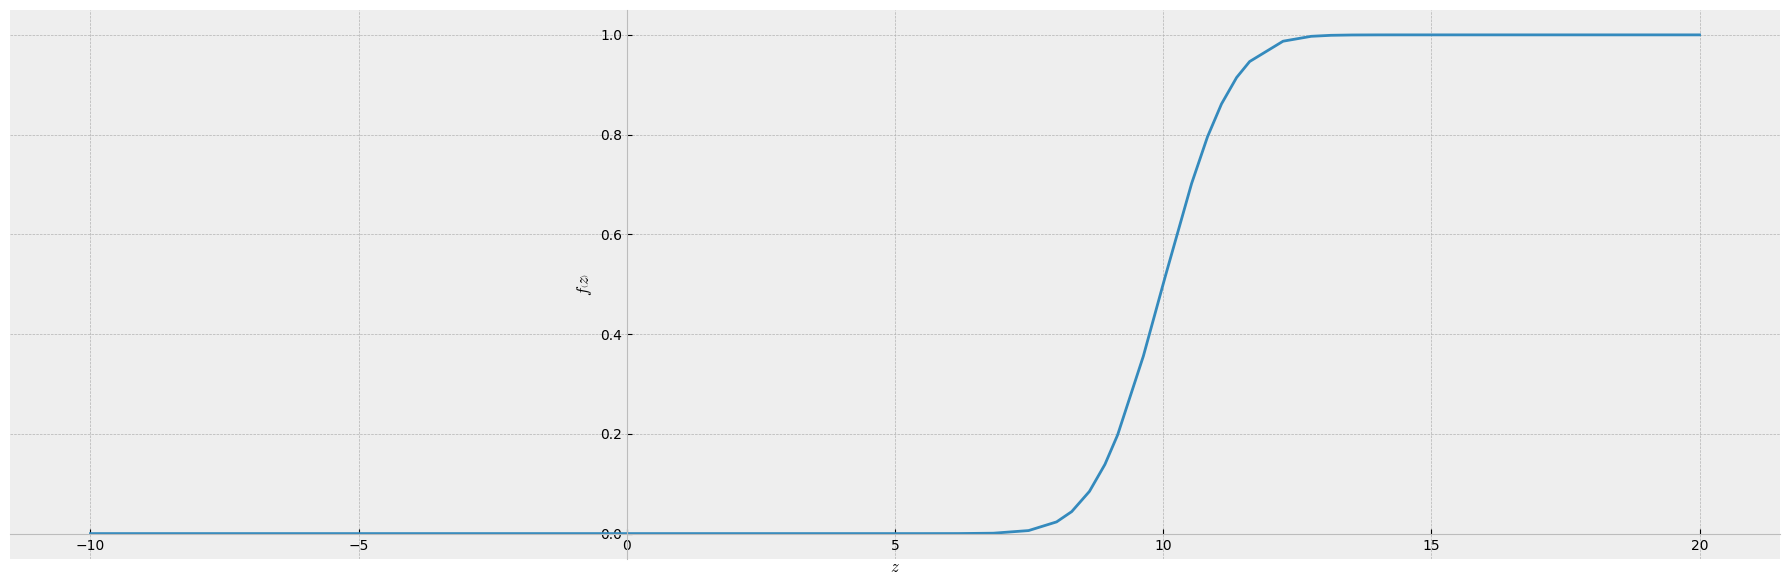

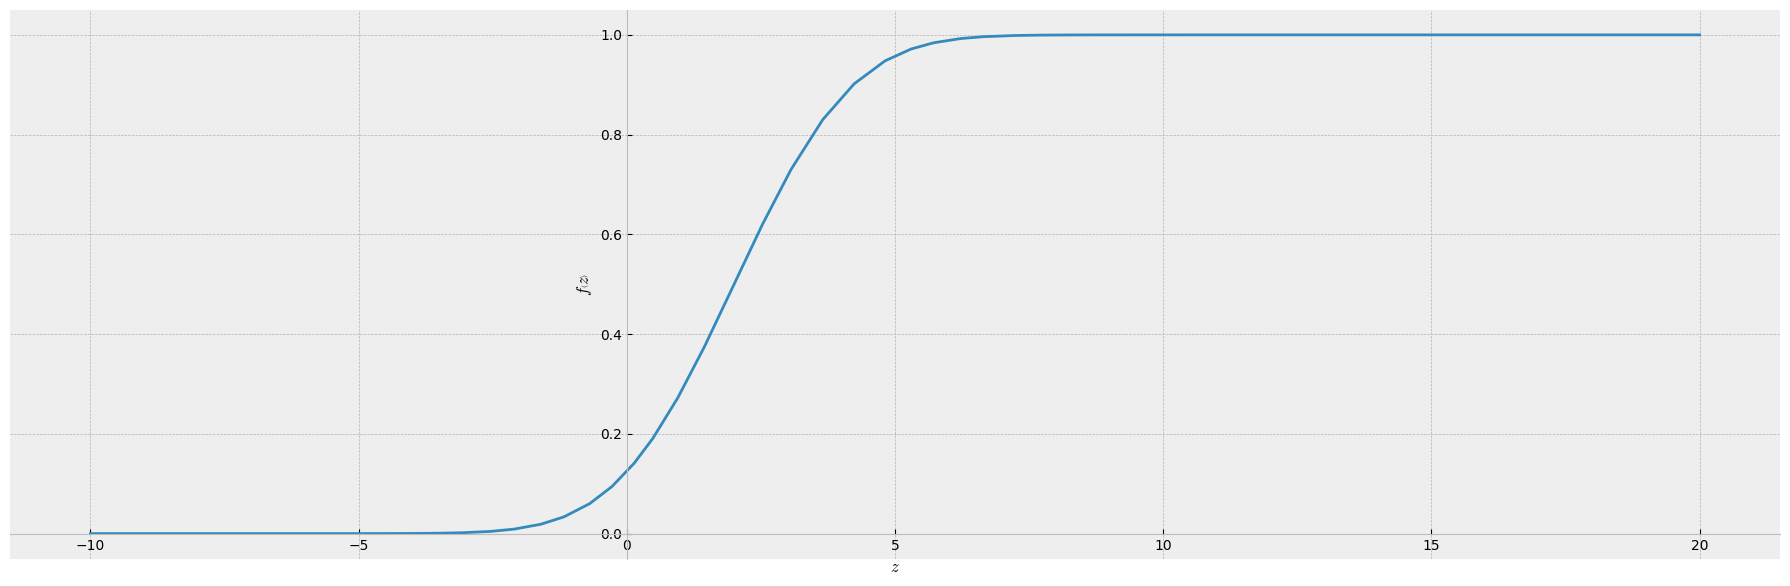

In [211]:
mu  = sp.Symbol("mu")
mux  = sp.Symbol("mu_x")
sigma = sp.Symbol("sigma", positive=True)
sigmax = sp.Symbol("sigma_x", positive=True)
z = sp.Symbol("z")
X = sp.stats.Normal("x", mu, sigma)
Y = sp.stats.Normal("x2", mux, sigmax)
plt.rcParams['figure.figsize'] = 18, 6
f = density(X)(z)
f
# X plot pdf
sp.plot(f.subs(sigma,sp.sqrt(1)).subs(mu,10), (z, -10, 20))
# Y plot pfd
sp.plot(f.subs(sigma,sp.sqrt(3)).subs(mu,2), (z, -10, 20))
# X plot cdf
g = sp.simplify(cdf(X))(z) 
g
sp.plot(g.subs(sigma,sp.sqrt(1)).subs(mu,10), (z, -10, 20))
# Y plot cdf
sp.plot(g.subs(sigma,sp.sqrt(3)).subs(mu,2), (z, -10, 20))

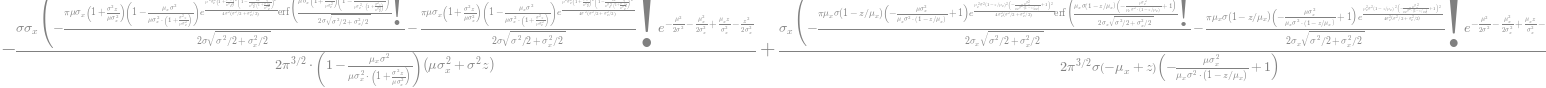

In [206]:
xy = density(X+Y)(z)
xy

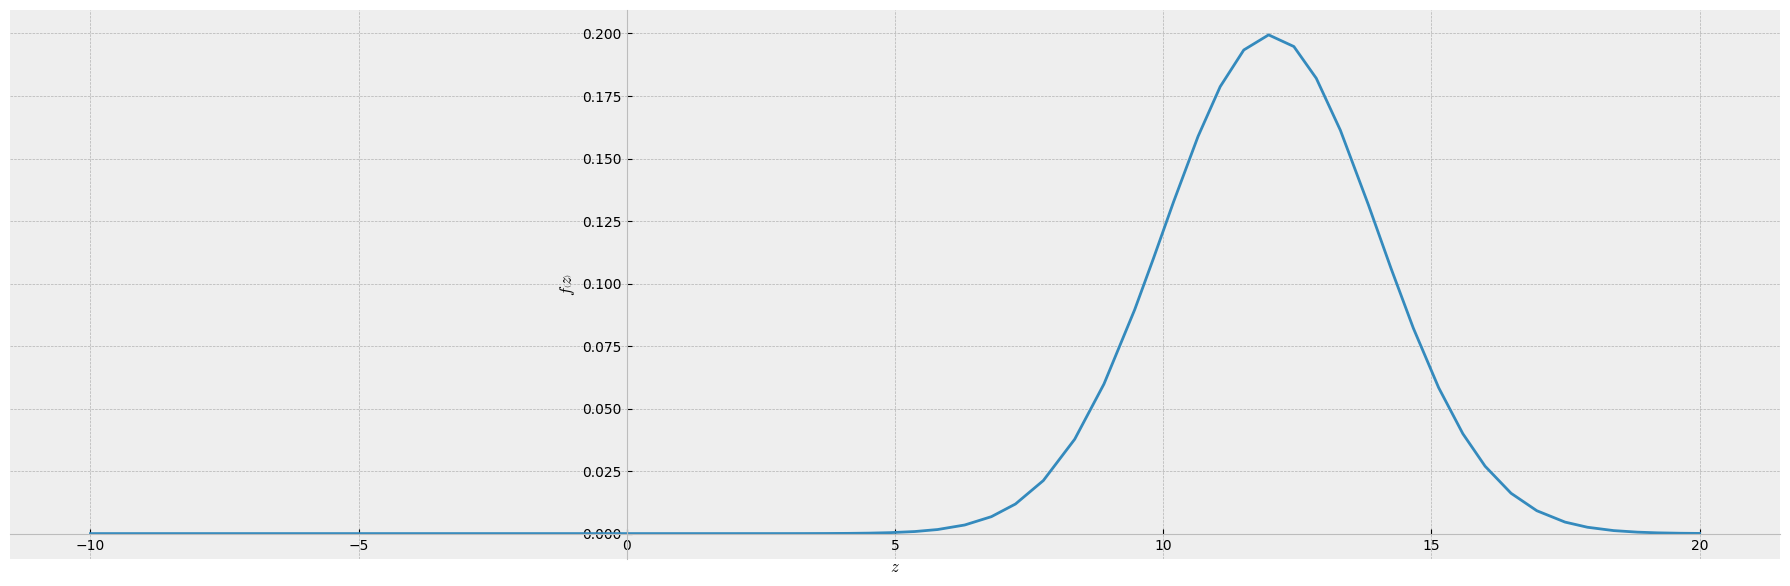

In [212]:
sp.plot(xy.subs(sigma,sp.sqrt(1)).subs(mu,10).subs(sigmax,sp.sqrt(3)).subs(mux,2), (z, -10, 20))

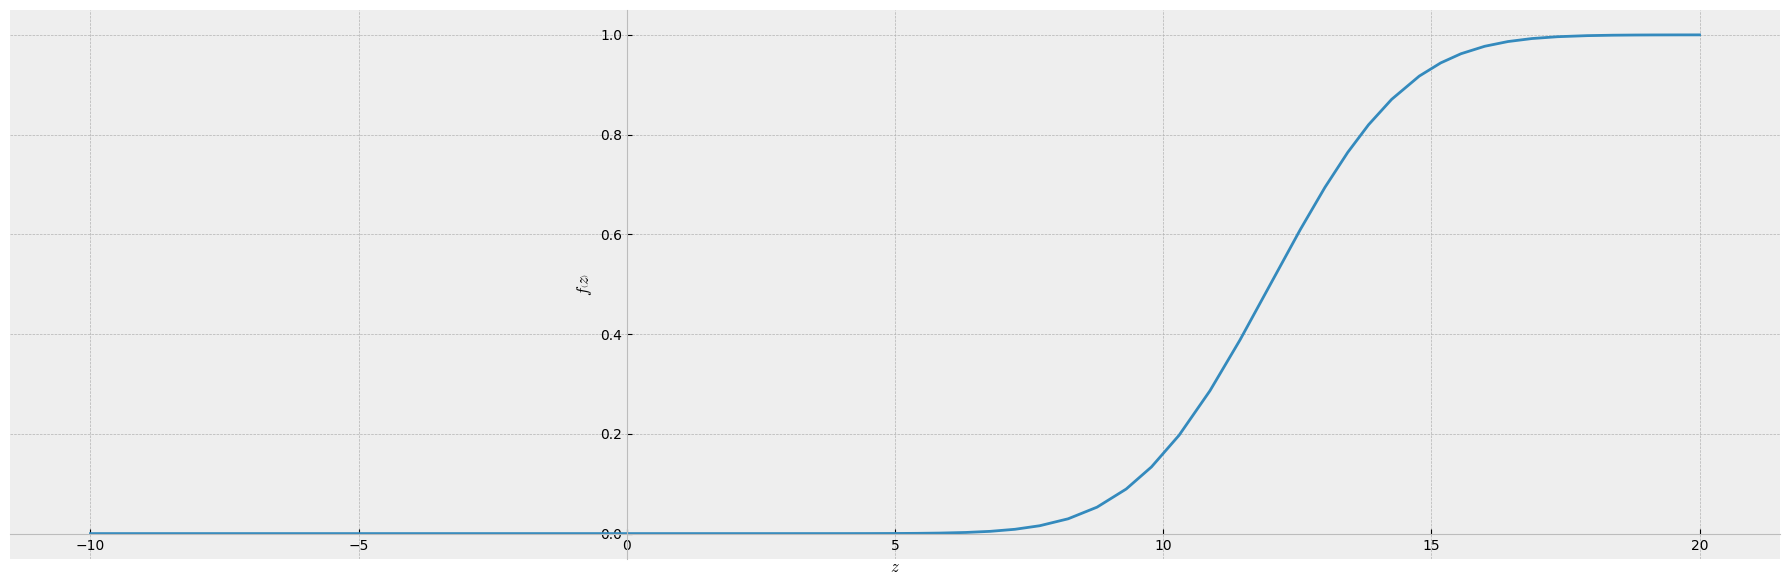

In [223]:
# xy_cdf = cdf(X+Y)(z) 
# xy_cdf
# Gives an error
muz  = sp.Symbol("mu_z")
sigmaz = sp.Symbol("sigma_z", positive=True)
Z = sp.stats.Normal("x3", muz, sigmaz)
# muz = mux + muy = 10 + 2 = 12
#sigmaz^2 = sigmax^2+sigmay^2 = 1 + 3 = 4
z_cdf = sp.simplify(cdf(Z))(z) 
z_cdf
sp.plot(z_cdf.subs(sigmaz,sp.sqrt(4)).subs(muz,12), (z, -10, 20))

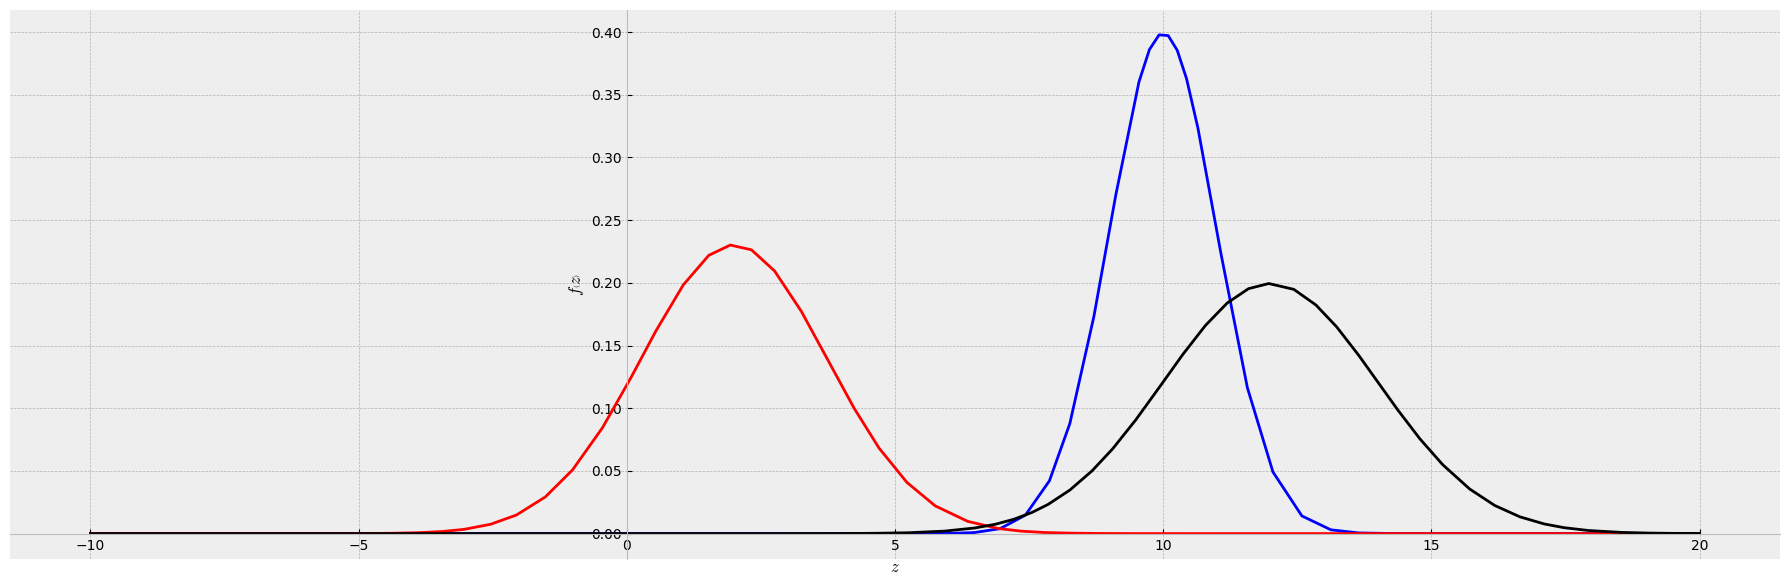

In [235]:
# All pdf in one picture
plot = sp.plot(f.subs(sigma,sp.sqrt(1)).subs(mu,10), f.subs(sigma,sp.sqrt(3)).subs(mu,2), xy.subs(sigma,sp.sqrt(1)).subs(mu,10).subs(sigmax,sp.sqrt(3)).subs(mux,2), (z, -10, 20), show=False)

plot[0].line_color = 'b'
plot[1].line_color = 'r'
plot[2].line_color = 'k'
plot.show()

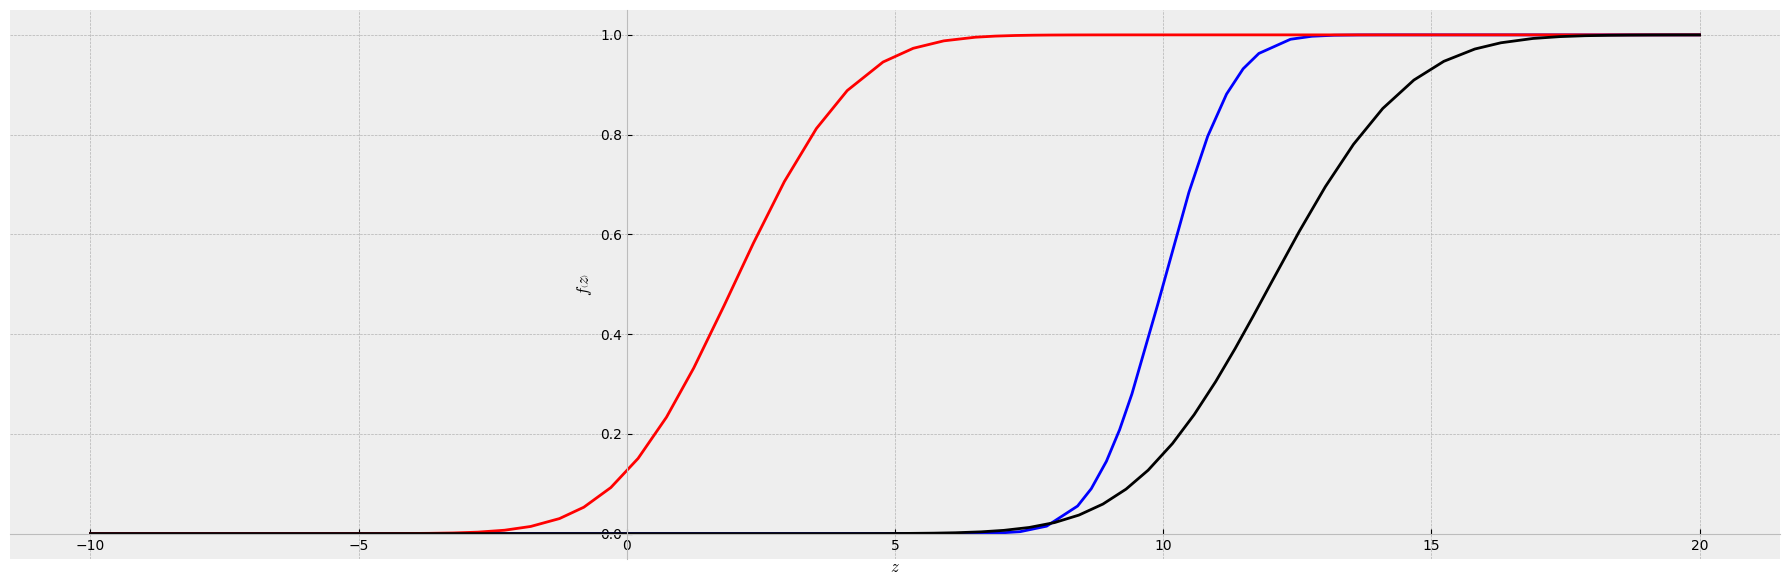

In [236]:
# All cdf in one picture
plot = sp.plot(g.subs(sigma,sp.sqrt(1)).subs(mu,10), g.subs(sigma,sp.sqrt(3)).subs(mu,2), z_cdf.subs(sigmaz,sp.sqrt(4)).subs(muz,12), (z, -10, 20), show=False)
plot[0].line_color = 'b'
plot[1].line_color = 'r'
plot[2].line_color = 'k'
plot.show()

The mean of the new plot is the sum of the original distributions which can be seen in the graph as the black distribution's middle portion is located the furthest away. This means that the distribution will get higher value outcomes. From the cdf we can see that the combinated distribution is more declined the the other two are seperately. This means that the combined distribution gets values from more wide spread area thus the integral growing slower. This can be also seen in the pdf as the "amplitude" of the figure is lower than the other one's since all of their area is one.